### imports

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# data = pd.read_csv('./world-development-indicators/WDIData.csv', sep=',')
data = pd.read_csv('./world-development-indicators/WDIData_bis.csv', sep=',')
data.shape

(7672338, 7)

In [3]:
data.head()

,Unnamed: 0,CountryCode,CountryName,IndicatorCode,IndicatorName,Value,Year
0,0,ARB,Arab World,EG.CFT.ACCS.ZS,Access to clean fuels and technologies for coo...,73.675898,2000
1,1,ARB,Arab World,EG.CFT.ACCS.ZS,Access to clean fuels and technologies for coo...,74.928059,2001
2,2,ARB,Arab World,EG.CFT.ACCS.ZS,Access to clean fuels and technologies for coo...,76.255400,2002
3,3,ARB,Arab World,EG.CFT.ACCS.ZS,Access to clean fuels and technologies for coo...,77.129805,2003
4,4,ARB,Arab World,EG.CFT.ACCS.ZS,Access to clean fuels and technologies for coo...,78.114145,2004


### Count of countries?

In [4]:
countries = data['CountryName'].unique().tolist()
len(countries)

263

### Count of countries code?

In [5]:
countries_code = data['CountryCode'].unique().tolist()
len(countries_code)

263

### Count of indicators?

In [6]:
indicators = data['IndicatorCode'].unique().tolist()
len(indicators)

1585

### Remodel DataFrame

In [7]:
# d = []
# for index, row in data.iterrows():
#     for i in range(1969, 2017):
#         if not pd.isna(row[str(i)]):
#             d.append({
#                 'CountryName': row['Country Name'],
#                 'CountryCode': row['Country Code'],
#                 'IndicatorName': row['Indicator Name'],
#                 'IndicatorCode': row['Indicator Code'],
#                 'Year': str(i),
#                 'Value': row[str(i)]})
# pd = pd.DataFrame(d)

In [8]:
# pd.head()
# pd.shape

In [9]:
# pd.to_csv('./world-development-indicators/WDIData_bis.csv', sep=',', encoding='utf-8')

### How many years of data do we have?

In [10]:
years = data['Year'].unique().tolist()
len(years)

48

### What's the range of years?

In [11]:
print("Minimal year is: {0}\nMaximun year is: {1}".format(min(years), max(years)))

Minimal year is: 1969
Maximun year is: 2016


<h2 style="color: #2A738B">Matplotlib: Basic Plotting</h2

### Explore CO2 emissions per capita in Spain

In [12]:
# select CO2 emissions for the Spain
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'ESP'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the ESP for country code and CO2 emissions indicator
stage = data[mask1 & mask2]

In [13]:
stage.head()

,Unnamed: 0,CountryCode,CountryName,IndicatorCode,IndicatorName,Value,Year
6551626,6551626,ESP,Spain,EN.ATM.CO2E.PC,CO2 emissions (metric tons per capita),2.897102,1969
6551627,6551627,ESP,Spain,EN.ATM.CO2E.PC,CO2 emissions (metric tons per capita),3.457970,1970
6551628,6551628,ESP,Spain,EN.ATM.CO2E.PC,CO2 emissions (metric tons per capita),3.759950,1971
6551629,6551629,ESP,Spain,EN.ATM.CO2E.PC,CO2 emissions (metric tons per capita),4.190967,1972
6551630,6551630,ESP,Spain,EN.ATM.CO2E.PC,CO2 emissions (metric tons per capita),4.440463,1973


### Let's see how emissions have changed over time using MatplotLib

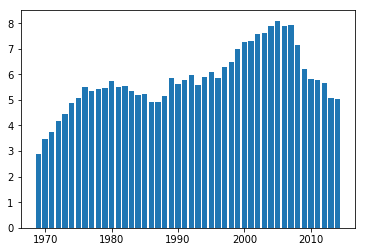

In [14]:
# get the years
years = stage['Year'].values
# get the values
co2 = stage['Value'].values

# create the graphic
plt.bar(years, co2)
plt.show()

### Let's do it a bit more appealing...

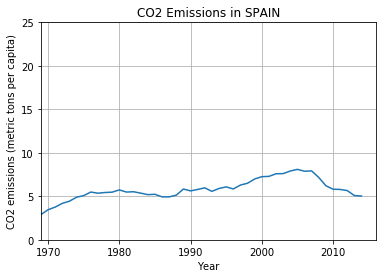

In [15]:
# swith to a line plot
plt.plot(years, co2)

# set label for the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

# label the figure
plt.title('CO2 Emissions in SPAIN')

# to make more honest, start they y axis at 0
plt.axis([1969, 2016, 0, 25])

plt.grid()
plt.show()

### Histogram graph

In [16]:
hist_data = stage['Value'].values

In [17]:
len(hist_data)

46

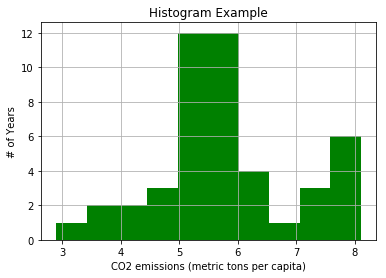

In [18]:
# the histogram of the data
plt.hist(hist_data, 10, density=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')
plt.grid(True)

plt.show()

### But, how do the Spain's numbers relate to those of other countries?

In [19]:
# select CO2 emissions for all countries in 2012
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2012

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['Year'].isin([hist_year])

# apply the mask
co2_2012 = data[mask1 & mask2]
co2_2012.head()

,Unnamed: 0,CountryCode,CountryName,IndicatorCode,IndicatorName,Value,Year
3103,3103,ARB,Arab World,EN.ATM.CO2E.PC,CO2 emissions (metric tons per capita),4.813631,2012
26291,26291,CSS,Caribbean small states,EN.ATM.CO2E.PC,CO2 emissions (metric tons per capita),8.886378,2012
48245,48245,CEB,Central Europe and the Baltics,EN.ATM.CO2E.PC,CO2 emissions (metric tons per capita),6.504367,2012
70675,70675,EAR,Early-demographic dividend,EN.ATM.CO2E.PC,CO2 emissions (metric tons per capita),2.295943,2012
96906,96906,EAS,East Asia & Pacific,EN.ATM.CO2E.PC,CO2 emissions (metric tons per capita),6.307092,2012


In [20]:
len(co2_2012)

251

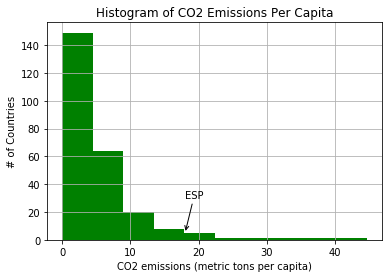

In [21]:
# Let's plt a histogram of the emissions per capita by country

# subplots returns a touple with the figure, axis attributes.
fig, ax = plt.subplots()

ax.annotate(
    'ESP',
    xy=(18, 5), xycoords='data',
    xytext=(18, 30), textcoords='data',
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

plt.hist(co2_2012['Value'], 10, density=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 Emissions Per Capita')
plt.grid(True)

plt.show()

### Relationship between GPD and CO2 Emissions in Spain

In [22]:
# select GPD per capita emissions for Spain
hist_indicator = 'Coal rents \(% of GDP\)'
hist_country = 'ESP'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

gpd_stage = data[mask1 & mask2]

In [23]:
gpd_stage.head(2)

,Unnamed: 0,CountryCode,CountryName,IndicatorCode,IndicatorName,Value,Year
6552224,6552224,ESP,Spain,NY.GDP.COAL.RT.ZS,Coal rents (% of GDP),0.017663,1970
6552225,6552225,ESP,Spain,NY.GDP.COAL.RT.ZS,Coal rents (% of GDP),0.019916,1971


In [24]:
stage.head(2)

,Unnamed: 0,CountryCode,CountryName,IndicatorCode,IndicatorName,Value,Year
6551626,6551626,ESP,Spain,EN.ATM.CO2E.PC,CO2 emissions (metric tons per capita),2.897102,1969
6551627,6551627,ESP,Spain,EN.ATM.CO2E.PC,CO2 emissions (metric tons per capita),3.457970,1970


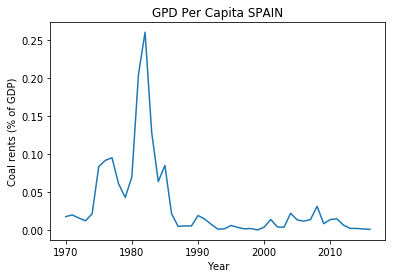

In [25]:
# switch to a Line plt
plt.plot(gpd_stage['Year'].values, gpd_stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(gpd_stage['IndicatorName'].iloc[0])

# Label the figure
plt.title('GPD Per Capita SPAIN')

# to make more honest, start they y axis at 0
# plt.axis([1969, 2012, 0, 25])

plt.show()

### ScatterPlot for comparing GPD against CO2 emissions per capita

First, we will need to make sure we are looking at the same times frames

In [26]:
print("GPD min year = {0}, and the max year = {1}".format(gpd_stage['Year'].min(), gpd_stage['Year'].max()))
print("CO2 min year = {0}, and the max year = {1}".format(stage['Year'].min(), stage['Year'].max()))

GPD min year = 1970, and the max year = 2016
CO2 min year = 1969, and the max year = 2014


We need both GPD and CO2 values have equal length

In [27]:
gpd_stage_trunc = gpd_stage[gpd_stage['Year'] < 2015]
co2_stage_trunc = stage[stage['Year'] > 1969]
print(len(gpd_stage_trunc))
print(len(co2_stage_trunc))

45
45


In [28]:
print("GPD min year = {0}, and the max year = {1}".format(
    gpd_stage_trunc['Year'].min(),
    gpd_stage_trunc['Year'].max()))
print("CO2 min year = {0}, and the max year = {1}".format(
    co2_stage_trunc['Year'].min(),
    co2_stage_trunc['Year'].max()))

GPD min year = 1970, and the max year = 2014
CO2 min year = 1970, and the max year = 2014


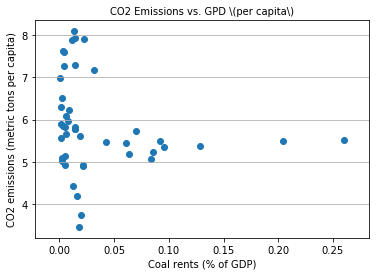

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GPD \(per capita\)', fontsize=10)
axis.set_xlabel(gpd_stage_trunc['IndicatorName'].iloc[0], fontsize=10)
axis.set_ylabel(co2_stage_trunc['IndicatorName'].iloc[0], fontsize=10)

X = gpd_stage_trunc['Value']
Y = co2_stage_trunc['Value']

axis.scatter(X, Y)
plt.show()

Test the correlation

In [30]:
np.corrcoef(gpd_stage_trunc['Value'], co2_stage_trunc['Value'])

array([[ 1.        , -0.19294496],
       [-0.19294496,  1.        ]])